In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
import visual_behavior.data_access.loading as loading
import visual_behavior.ophys.response_analysis.utilities as utilities
from visual_behavior.ophys.response_analysis.response_analysis import ResponseAnalysis

In [4]:
experiments_table = loading.get_filtered_ophys_experiment_table() 

In [5]:
experiments_table.head()

,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,...,imaging_depth,targeted_structure,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,model_outputs_available,location
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
953659745,952430817,952554548,1018028339,VisualBehaviorMultiscope,completed,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,...,75,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISp_75
953659749,952430817,952554548,1018028354,VisualBehaviorMultiscope,completed,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,...,150,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISl_150
953659752,952430817,952554548,1018028357,VisualBehaviorMultiscope,completed,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,...,225,VISl,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISl_225
953659743,952430817,952554548,1018028345,VisualBehaviorMultiscope,completed,passed,20190923_457841_2imagesA,OPHYS_2_images_A_passive,MESO.1,2019-09-23 08:13:07.627573,...,225,VISp,NaN,850862430,Sst-IRES-Cre,NaN,"z_drift_corr_um_diff,z_drift_corr_um_diff,z_dr...",0,False,Sst_VISp_225
958527474,954954402,953982960,1018028339,VisualBehaviorMultiscope,completed,passed,20190924_457841_3imagesA,OPHYS_3_images_A,MESO.1,2019-09-24 16:00:00.000000,...,75,VISp,NaN,850862430,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_75


In [6]:
arbitrary_index = 600
experiments_table.iloc[arbitrary_index]

ophys_session_id                                                 959751299
behavior_session_id                                              959893902
container_id                                                     941373529
project_code                                          VisualBehaviorTask1B
container_workflow_state                                      container_qc
experiment_workflow_state                                           passed
session_name                                      20191002_470784_Apassive
session_type                                      OPHYS_5_images_A_passive
equipment_name                                                     CAM2P.5
date_of_acquisition                             2019-10-02 18:23:56.000000
isi_experiment_id                                                899181668
specimen_id                                                      887264964
sex                                                                      F
age_in_days              

In [7]:
### get SDK dataset

In [8]:
ophys_experiment_id = experiments_table.index.values[arbitrary_index]

dataset = loading.get_ophys_dataset(ophys_experiment_id)

In [9]:
### get ResponseAnalysis object

In [10]:
analysis = ResponseAnalysis(dataset) 

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()


### get image evoked responses 

In [11]:
stim_response_df = analysis.get_response_df(df_name='stimulus_response_df')
stim_response_df = stim_response_df[stim_response_df.omitted==False] #have to remove omitted condition

C:\Users\marinag\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
stim_response_df.head()

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change,epoch
18,1,1007031744,"[0.01465961543596571, -0.0312677922764945, 0.0...","[-0.48466355908037795, -0.45235265514168604, -...",0.016860,0.016495,0.1706,0.0813,0.3481,0.25021,18001.0,0,im065,False,17986,306.715018,306.965228,False,0
19,1,1007031912,"[0.006604280932304351, -0.059887848493777755, ...","[-0.48466355908037795, -0.45235265514168604, -...",0.010657,0.004616,0.3034,0.2178,0.3759,0.25021,18001.0,0,im065,False,17986,306.715018,306.965228,False,0
20,1,1007031977,"[-0.08742996452646076, -0.06504937755070708, -...","[-0.48466355908037795, -0.45235265514168604, -...",-0.039826,-0.003133,0.9776,0.9791,0.9826,0.25021,18001.0,0,im065,False,17986,306.715018,306.965228,False,0
21,1,1007031945,"[0.0460337561912068, -0.035613771354021606, 0....","[-0.48466355908037795, -0.45235265514168604, -...",0.022743,0.028108,0.1048,0.0711,0.2063,0.25021,18001.0,0,im065,False,17986,306.715018,306.965228,False,0
22,1,1007032142,"[0.06834106977721817, 0.039558660589513656, -0...","[-0.48466355908037795, -0.45235265514168604, -...",-0.021873,-0.014025,0.9255,0.8785,0.9228,0.25021,18001.0,0,im065,False,17986,306.715018,306.965228,False,0


### get average image evoked response for each image

In [13]:
conditions = ['cell_specimen_id', 'image_name'] # conditions to groupby before averaging
stim_mean_df = utilities.get_mean_df(stim_response_df, analysis=analysis, conditions=conditions, flashes=True)

In [14]:
stim_mean_df.head()

,cell_specimen_id,image_name,mean_response,sem_response,mean_trace,sem_trace,mean_responses,mean_baseline,sem_baseline,pref_stim,peak_response,time_to_peak,fano_factor,fraction_significant_p_value_gray_screen,fraction_significant_p_value_omission,fraction_significant_p_value_stimulus
0,1007031649,im061,0.002954,0.000846,"[0.006394368120867573, 0.012554300469531833, 0...","[0.0036211404385603336, 0.003443426191068341, ...","[-0.025171650937274723, -0.031325864125417366,...",0.003789,0.000983,False,0.009496,0.387731,13.669409,0.049209,0.049209,0.001757
1,1007031649,im062,0.002880,0.000891,"[0.0019233218303056126, 0.007282487986521909, ...","[0.0034835668009911116, 0.003467366524347323, ...","[0.009483920873482349, -0.020058833528693545, ...",0.002961,0.000866,False,0.008725,0.355420,14.477678,0.065693,0.071168,0.001825
2,1007031649,im063,0.006568,0.000962,"[0.015288911408403865, 0.009185167951388096, 0...","[0.003630492289767331, 0.0035303322007569846, ...","[-0.0018522225754363886, 0.010379610577334924,...",0.000098,0.000998,False,0.023690,0.161555,7.142449,0.094276,0.094276,0.013468
3,1007031649,im065,0.016265,0.002337,"[0.037100085477635256, 0.03230850533522856, 0....","[0.005335933552922024, 0.005180091340350055, 0...","[-0.023366739210750234, 0.04338501540046145, -...",0.008844,0.001733,False,0.038035,0.323109,6.968585,0.144558,0.149660,0.073129
4,1007031649,im066,0.006101,0.000975,"[0.0212787650844459, 0.016578060328501842, 0.0...","[0.0036923845389250282, 0.003628450314598559, ...","[-0.013506533826476881, -0.02038632016801263, ...",0.003394,0.001086,False,0.021527,0.258487,7.769398,0.093063,0.093063,0.011844


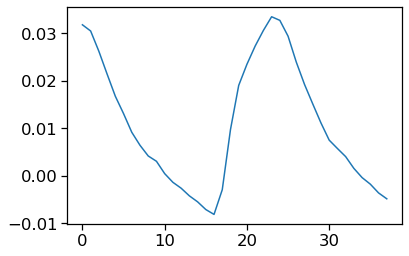

In [15]:
# plot mean across all neurons
plt.plot(stim_mean_df.mean_trace.mean())

### get change evoked responses

In [16]:
trial_response_df = analysis.get_response_df(df_name='trials_response_df')
trial_response_df = trial_response_df[trial_response_df.go==True] #limit to change trials

C:\Users\marinag\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
trial_response_df.head()

,trials_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,lick_times,...,stop_time,trial_length,behavioral_response_time,change_frame,change_time,behavioral_response_latency,initial_image_name,change_image_name,epoch,trial_type
0,0,1007031744,"[0.01465961543596571, -0.0312677922764945, 0.0...","[-4.975879206558547, -4.943568302619855, -4.91...",-0.042637,0.058395,0.9983,0.8643,0.9870,[],...,315.433318,8.75716,NaN,18255,311.218718,inf,im065,im061,0,miss
1,0,1007031912,"[0.006604280932304351, -0.059887848493777755, ...","[-4.975879206558547, -4.943568302619855, -4.91...",-0.012713,0.027472,0.7886,0.6438,0.8028,[],...,315.433318,8.75716,NaN,18255,311.218718,inf,im065,im061,0,miss
2,0,1007031977,"[-0.08742996452646076, -0.06504937755070708, -...","[-4.975879206558547, -4.943568302619855, -4.91...",-0.002409,0.007463,0.5450,0.5691,0.6205,[],...,315.433318,8.75716,NaN,18255,311.218718,inf,im065,im061,0,miss
3,0,1007031945,"[0.0460337561912068, -0.035613771354021606, 0....","[-4.975879206558547, -4.943568302619855, -4.91...",-0.024863,0.062514,0.9289,0.7836,0.9257,[],...,315.433318,8.75716,NaN,18255,311.218718,inf,im065,im061,0,miss
4,0,1007032142,"[0.06834106977721817, 0.039558660589513656, -0...","[-4.975879206558547, -4.943568302619855, -4.91...",0.000058,-0.010569,0.5857,0.5860,0.6152,[],...,315.433318,8.75716,NaN,18255,311.218718,inf,im065,im061,0,miss


### get trial averaged change aligned traces

In [18]:
conditions = ['cell_specimen_id', 'change_image_name'] # conditions to groupby before averaging
trials_mean_df = utilities.get_mean_df(trial_response_df, analysis=analysis, conditions=conditions)

In [19]:
trials_mean_df.head()

,cell_specimen_id,change_image_name,mean_response,sem_response,mean_trace,sem_trace,mean_responses,mean_baseline,sem_baseline,pref_stim,peak_response,time_to_peak,fano_factor,fraction_significant_p_value_gray_screen,fraction_significant_p_value_omission,fraction_significant_p_value_stimulus
0,1007031649,im061,0.003192,0.003106,"[0.042419542282187556, 0.032775523456856595, 0...","[0.019105786625705248, 0.015179277157762612, 0...","[-0.025171650937274723, -0.012884802289761386,...",0.016313,0.006275,False,0.025533,0.387731,13.054384,0.000000,0.000000,0.000000
1,1007031649,im062,0.009314,0.004005,"[0.012823643860380004, 0.020738580949880178, -...","[0.012271411600013138, 0.013099339156213988, 0...","[0.009483920873482349, 0.002033933351039667, 0...",0.002879,0.003409,False,0.028900,0.355420,5.640180,0.186047,0.186047,0.023256
2,1007031649,im063,0.004256,0.003372,"[0.029161570736654013, 0.02311803202677523, 0....","[0.014309465765316083, 0.013722100851907785, 0...","[-0.0018522225754363886, 0.011160954617833951,...",0.009958,0.005892,False,0.048435,0.161555,10.749489,0.065217,0.065217,0.043478
3,1007031649,im065,0.014625,0.005173,"[0.05799939766421796, 0.046833494686910365, 0....","[0.063475440862373, 0.059198412923176735, 0.05...","[0.058027267828079945, 0.003916436237877763, 0...",0.002980,0.004224,False,0.030786,0.193865,4.638522,0.186047,0.209302,0.023256
4,1007031649,im066,0.000420,0.003353,"[0.019241113078295752, 0.04166966807415124, 0....","[0.01251455201245645, 0.01386852445326427, 0.0...","[-0.013506533826476881, -0.0018107006968773182...",0.016721,0.008060,False,0.025392,0.161555,107.213473,0.044444,0.044444,0.000000


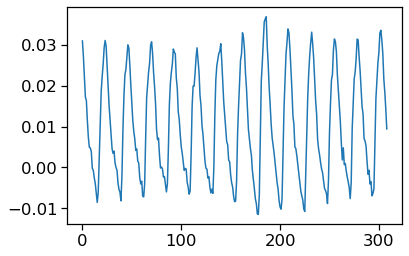

In [20]:
# plot mean across all neurons
plt.plot(trials_mean_df.mean_trace.mean())

### get omission aligned running speed

In [21]:
omission_run_speed_df = analysis.get_response_df(df_name='omission_run_speed_df')

C:\Users\marinag\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


#### the <code>mean_response</code> column is the mean running speed in a 750ms window after omission onset


In [22]:
omission_run_speed_df.head()

,index,stimulus_presentations_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change,epoch
0,0,0,"[3.608619673124558, 3.7386124355524757, 3.7419...","[-4.987499851870218, -4.970819250358947, -4.95...",0.140744,0.795366,0.4087,0.3184,0.3366,NaN,NaN,8,omitted,True,0,6.688738,NaN,False,0
1,2,12,"[-3.0525394222339135, -1.6907585364654547, 0.0...","[-4.987499851870218, -4.970819250358947, -4.95...",-0.100115,-0.043612,0.8219,0.7551,0.7432,NaN,NaN,8,omitted,True,18480,314.955058,NaN,False,0
2,4,14,"[1.2173958328518057, -0.14573533217658108, -0....","[-4.987499851870218, -4.970819250358947, -4.95...",0.123401,-0.020409,0.4382,0.3496,0.3597,NaN,NaN,8,omitted,True,18570,316.456328,NaN,False,0
3,6,16,"[-0.8865860122995172, -0.6207965148684939, -0....","[-4.987499851870218, -4.970819250358947, -4.95...",-0.113601,-0.039162,0.8378,0.7942,0.7616,NaN,NaN,8,omitted,True,18660,317.957538,NaN,False,0
4,8,36,"[0.5042374226679424, 0.5046920987633076, 0.415...","[-4.987499851870218, -4.970819250358947, -4.95...",-0.311404,-0.225625,0.9661,0.9688,0.9411,NaN,NaN,8,omitted,True,19560,332.969728,NaN,False,0


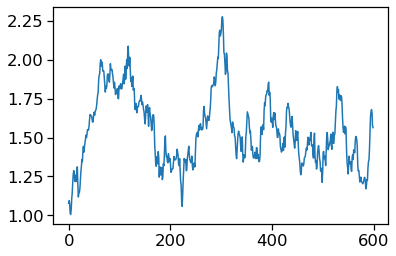

In [23]:
# plot mean across all omissions
plt.plot(omission_run_speed_df.trace.mean())

### running speed after images

In [24]:
stim_run_speed = analysis.get_response_df(df_name='stimulus_run_speed_df')
stim_run_speed = stim_run_speed[stim_run_speed.omitted==False] #have to remove omitted condition

In [25]:
#### here the <code>mean_response</code> column is the mean running speed in a 500ms window after image onset
stim_run_speed.head()

,index,stimulus_presentations_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,p_value_baseline,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change,epoch
1,2,1,"[-0.5359736829111105, -0.4353236264357693, -0....","[-0.48373744382687733, -0.4670568423156057, -0...",-0.104373,0.123336,0.7804,0.7338,0.7377,0.445918,0.25021,18001.0,0,im065,False,17986,306.715018,306.965228,False,0
2,4,2,"[0.4327228672992035, 0.43417293004364166, 0.43...","[-0.48373744382687733, -0.4670568423156057, -0...",-0.611525,-0.895431,0.9899,0.9836,0.9827,0.260872,0.25018,18046.0,0,im065,False,18031,307.465658,307.715838,False,0
3,6,3,"[-1.4838653030197835, -1.159085513041183, -1.1...","[-0.48373744382687733, -0.4670568423156057, -0...",-0.360466,0.088512,0.9526,0.9488,0.9381,0.247688,0.25020,18091.0,0,im065,False,18076,308.216248,308.466448,False,0
4,8,4,"[2.2297486549674477, 2.2312481395978705, 0.633...","[-0.48373744382687733, -0.4670568423156057, -0...",-0.722638,0.386262,0.9957,0.9888,0.9877,0.020429,0.25021,18136.0,0,im065,False,18121,308.966848,309.217058,False,0
5,10,5,"[2.73951711301958, 2.7607561022160283, 2.74113...","[-0.48373744382687733, -0.4670568423156057, -0...",0.699002,-0.167610,0.0347,0.0977,0.1262,0.119941,0.25021,18181.0,0,im065,False,18166,309.717468,309.967678,False,0


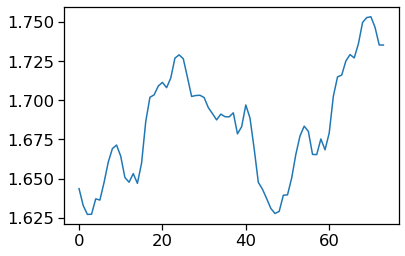

In [26]:
# plot mean across all images
plt.plot(stim_run_speed.trace.mean())

### pupil area after images

#### only works for datasets that have pupil area

In [27]:
stim_pupil_area = analysis.get_response_df(df_name='stimulus_pupil_area_df')
stim_pupil_area = stim_pupil_area[stim_pupil_area.omitted==False] #have to remove omitted condition

C:\Users\marinag\Documents\Code\AllenSDK\allensdk\brain_observatory\sync_dataset.py:109: UserWarning: The loaded sync file contains the following deprecated line label keys: {'cam2_exposure', 'cam1_exposure'}. Consider updating the sync file line labels.
  self._check_line_labels()
C:\Users\marinag\Anaconda3\envs\visual_behavior_sdk\lib\site-packages\xarray\core\nanops.py:160: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


#### here the <code>mean_response</code> column is the mean pupil area in a 500ms window after image onset


In [28]:
stim_pupil_area.head()

,stimulus_presentations_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,p_value_baseline,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change,epoch
1,1,"[4965.256662937493, 4976.731319238198, 4920.49...","[-0.46667862676211624, -0.4333444391362508, -0...",4821.113616,5013.381503,0.1140,0.2075,0.2354,0.000099,0.25021,18001.0,0,im065,False,17986,306.715018,306.965228,False,0
2,2,"[4744.204193883947, 4879.540910451619, 4754.08...","[-0.46667862676211624, -0.4333444391362508, -0...",4751.412497,4598.169772,0.1228,0.2075,0.2439,0.024187,0.25018,18046.0,0,im065,False,18031,307.465658,307.715838,False,0
3,3,"[4921.098481182392, 4779.367329746135, 4862.94...","[-0.46667862676211624, -0.4333444391362508, -0...",4593.520462,4655.918988,0.1692,0.2365,0.2666,0.329881,0.25020,18091.0,0,im065,False,18076,308.216248,308.466448,False,0
4,4,"[4761.869247475412, 4666.219197965093, 4498.55...","[-0.46667862676211624, -0.4333444391362508, -0...",4585.744647,4479.331788,0.1706,0.2365,0.2671,0.109313,0.25021,18136.0,0,im065,False,18121,308.966848,309.217058,False,0
5,5,"[4804.279841294699, 4655.046514991171, 4733.76...","[-0.46667862676211624, -0.4333444391362508, -0...",4389.135745,4502.240698,0.2550,0.2850,0.3032,0.059711,0.25021,18181.0,0,im065,False,18166,309.717468,309.967678,False,0


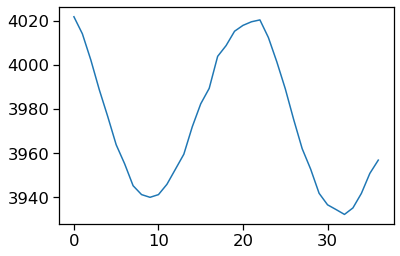

In [29]:
# plot mean across all images
plt.plot(stim_pupil_area.trace.mean())

### pupil area after omission

In [30]:
omission_pupil_area = analysis.get_response_df(df_name='omission_pupil_area_df')

In [31]:
omission_pupil_area.head()

,stimulus_presentations_id,trace,trace_timestamps,mean_response,baseline_response,p_value_gray_screen,p_value_omission,p_value_stimulus,duration,end_frame,image_index,image_name,omitted,start_frame,start_time,stop_time,change,epoch
0,0,"[11508.220317668716, 11518.263027197543, 11595...","[-5.0, -4.966666666666667, -4.933333333333334,...",3299.175345,3555.829418,0.9896,0.6102,0.6096,NaN,NaN,8,omitted,True,0,6.688738,NaN,False,0
1,12,"[4181.03823165303, 4346.693043028981, 4334.811...","[-5.0, -4.966666666666667, -4.933333333333334,...",3371.227751,3609.915524,0.9751,0.5817,0.5881,NaN,NaN,8,omitted,True,18480,314.955058,NaN,False,0
2,14,"[5699.109105543182, 5612.925909829815, 5461.45...","[-5.0, -4.966666666666667, -4.933333333333334,...",3160.066227,3200.021322,1.0000,0.6626,0.6548,NaN,NaN,8,omitted,True,18570,316.456328,NaN,False,0
3,16,"[4251.279152993528, 4177.819962433718, 4152.30...","[-5.0, -4.966666666666667, -4.933333333333334,...",2845.887012,2973.902693,1.0000,0.7432,0.7483,NaN,NaN,8,omitted,True,18660,317.957538,NaN,False,0
4,36,"[3143.1408451111215, 3057.4813337266896, 2997....","[-5.0, -4.966666666666667, -4.933333333333334,...",2900.956204,2788.839881,1.0000,0.7331,0.7268,NaN,NaN,8,omitted,True,19560,332.969728,NaN,False,0


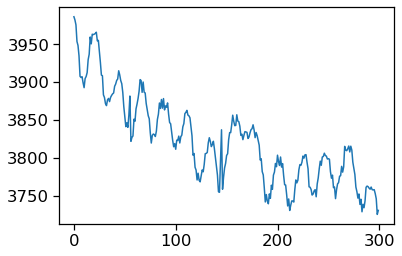

In [32]:
# plot mean across all omissions
plt.plot(omission_pupil_area.trace.mean())